In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("../../data/processed/cap-3.csv")
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Merit No,Marks,Application ID,Name of Candidate,Gender,Category,Category id,Seat Type,PWD/DEF,Sub Group,sub group name,cource_code,cource code name,college_code,Institute dict,Institute Name,Seat conformation,Seat conformation id
0,60,95.13,19106856,PAWAR SIDDHI RAVINDRASINGH,F,OPEN,1,LOPEN,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
1,213,93.38,19126045,MAHALLE SHRADDHA MOHANRAO,F,OBC,2,GOPEN,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
2,384,92.47,19105661,TUSHAR RAJESH LAHANE,M,OBC,2,GOBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
3,420,92.31,19103256,RAUT PALASH SUBHASH,M,OBC,2,GOBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0
4,846,90.79,19148502,BIRAJDAR SAURABH DAYANAND,M,SEBC,3,GSEBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0


In [ ]:
length=df.shape
for i in range(length[0]):
    if df.iloc[i]["Application ID"]==0:
        df.drop(i,inplace=True)

In [34]:
dummy_frame=pd.get_dummies(df["Gender"],drop_first=True)
df=pd.concat([df,dummy_frame],axis=1)

In [35]:
df.corr()

,Merit No,Marks,Application ID,Category id,Sub Group,cource_code,college_code,Seat conformation id,F,M
Merit No,1.000000,0.540966,0.703967,0.412531,0.650388,0.650224,0.586906,0.093338,0.115920,0.582314
Marks,0.540966,1.000000,0.977275,0.553842,0.890029,0.895341,0.843347,-0.107446,0.403300,0.613388
Application ID,0.703967,0.977275,1.000000,0.570479,0.912145,0.917514,0.857992,0.006627,0.369488,0.662395
Category id,0.412531,0.553842,0.570479,1.000000,0.500171,0.502768,0.499533,-0.040615,0.247544,0.348273
Sub Group,0.650388,0.890029,0.912145,0.500171,1.000000,0.991266,0.800270,-0.029632,0.276927,0.652647
cource_code,0.650224,0.895341,0.917514,0.502768,0.991266,1.000000,0.800999,-0.024176,0.280223,0.655146
college_code,0.586906,0.843347,0.857992,0.499533,0.800270,0.800999,1.000000,0.035980,0.321281,0.564855
Seat conformation id,0.093338,-0.107446,0.006627,-0.040615,-0.029632,-0.024176,0.035980,1.000000,-0.032432,0.032432
F,0.115920,0.403300,0.369488,0.247544,0.276927,0.280223,0.321281,-0.032432,1.000000,-0.451393
M,0.582314,0.613388,0.662395,0.348273,0.652647,0.655146,0.564855,0.032432,-0.451393,1.000000


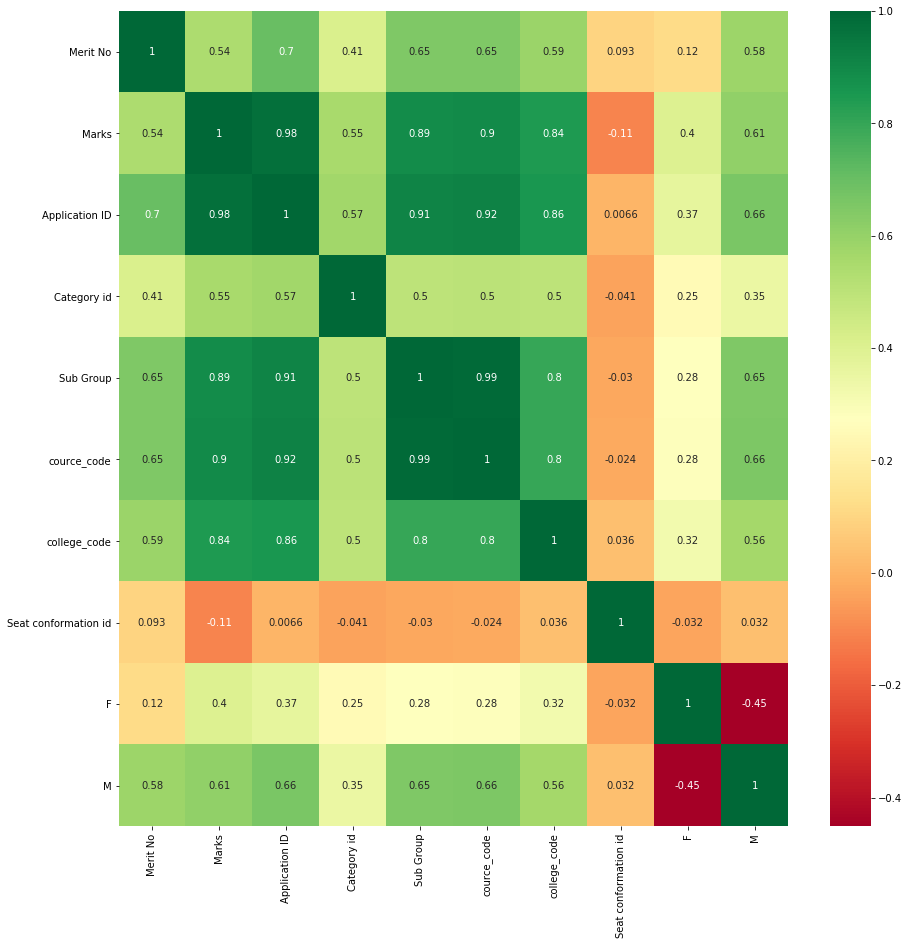

In [36]:
cormat=df.corr()
top_cor_feature=cormat.index
plt.figure(figsize=(15,15))
sns.heatmap(df[top_cor_feature].corr(),annot=True,cmap="RdYlGn")

In [43]:
x=df[["Marks","Gender","Category","Seat Type","sub group name"]]
y=df["Institute Name"]

In [45]:
y

0        Government College of Engineering, Amravati
1        Government College of Engineering, Amravati
2        Government College of Engineering, Amravati
3        Government College of Engineering, Amravati
4        Government College of Engineering, Amravati
                            ...                     
73575                                            NaN
73576                                            NaN
73577                                            NaN
73578                                            NaN
73579                                            NaN
Name: Institute Name, Length: 73580, dtype: object

,Merit No,Marks,Application ID,Name of Candidate,Gender,Category,Category id,Seat Type,PWD/DEF,Sub Group,sub group name,cource_code,cource code name,college_code,Institute dict,Institute Name,Seat conformation,Seat conformation id,F,M
0,60,95.13,19106856,PAWAR SIDDHI RAVINDRASINGH,F,OPEN,1,LOPEN,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1,0
1,213,93.38,19126045,MAHALLE SHRADDHA MOHANRAO,F,OBC,2,GOPEN,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1,0
2,384,92.47,19105661,TUSHAR RAJESH LAHANE,M,OBC,2,GOBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,0,1
3,420,92.31,19103256,RAUT PALASH SUBHASH,M,OBC,2,GOBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,0,1
4,846,90.79,19148502,BIRAJDAR SAURABH DAYANAND,M,SEBC,3,GSEBC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,0,1
5,1941,88.47,19108714,GHUGARE SAKSHI RAVINDRA,F,SC,4,LSC,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1,0
6,2185,88.06,19110299,DIVYA KEDIA,F,OPEN/EWS,5,EWS,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1,0
7,8635,81.09,19115650,KOKATE SATYABHAMA PRALHAD,F,ST,6,LST,NaN,201,Civil,201,Civil,1002,Amravati,"Government College of Engineering, Amravati",^,1.0,1,0
13,0,0.00,0,0,0,NaN,0,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0
14,0,0.00,0,0,0,NaN,0,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,0
